# Neural network practice

## MNIST classification

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers

In [62]:
# Load data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [63]:
# Take a look at the data shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [64]:
# Take a look at the data format
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [65]:
print(y_train[0])

5


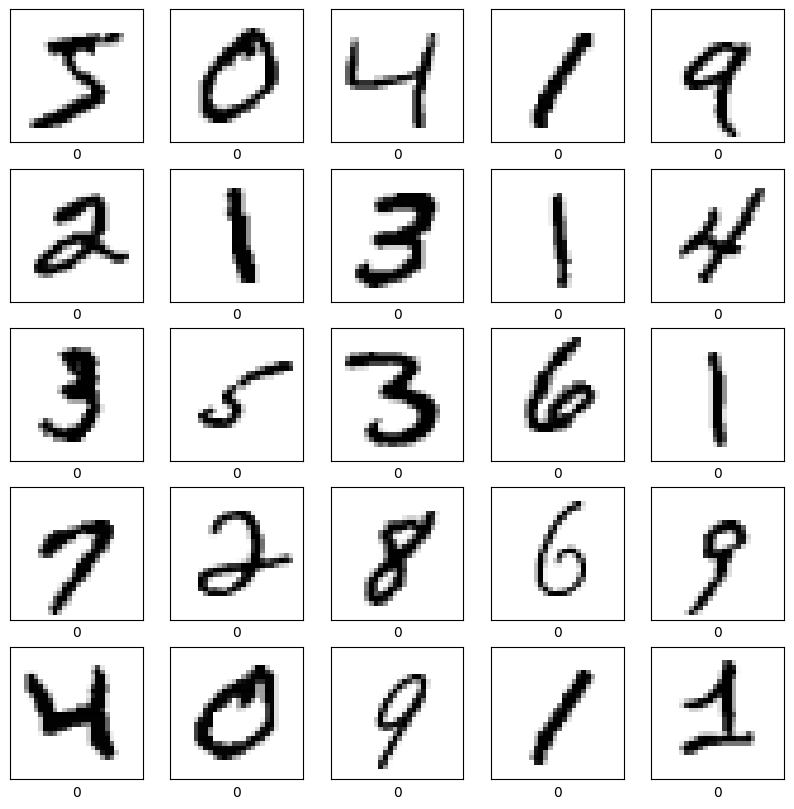

In [66]:
# Visualsise the first 25 data samples
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(y_train[i]))  # Display the label of each image
plt.show()

### MLP

In [67]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalise pixel values to [0, 1]

num_classes = 10
input_shape = (28, 28)

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0]) # take a look at our encoding

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [68]:
# Build the MLP model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),              # Flatten 28x28 images into 1D vectors
    layers.Dense(128, activation='relu'),              # First hidden layer with 128 neurons
    layers.Dropout(0.2),                              # Dropout with a 20% rate - orginally commented
    layers.Dense(96, activation='relu'),              # Extra hidden layer with 96 neurons - new addition
    layers.Dropout(0.2),                              # Dropout with a 20% rate - new addition
    layers.Dense(64, activation='relu'),               # Second hidden layer with 64 neurons
    layers.Dropout(0.2),                              # Dropout with a 20% rate - originally commented
    layers.Dense(10, activation='softmax')             # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary() # take a look at the model summary

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 96)                  │          12,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,722 (467.66 KB)

 Trainable params: 119,722 (467.66 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# Train the model
batch_size = 48 # originally 32
epochs = 15 # originally 10
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/15
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7747 - loss: 0.7099 - val_accuracy: 0.9670 - val_loss: 0.1117
Epoch 2/15
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9441 - loss: 0.1929 - val_accuracy: 0.9732 - val_loss: 0.0926
Epoch 3/15
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9553 - loss: 0.1506 - val_accuracy: 0.9762 - val_loss: 0.0818
Epoch 4/15
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9633 - loss: 0.1210 - val_accuracy: 0.9773 - val_loss: 0.0786
Epoch 5/15
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9672 - loss: 0.1120 - val_accuracy: 0.9752 - val_loss: 0.0794
Epoch 6/15
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9703 - loss: 0.0983 - val_accuracy: 0.9758 - val_loss: 0.0801
Epoch 7/15
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9724 - loss: 0.0926 - val_accuracy: 0.9790 - val_loss: 0.0680
Epoch 8/15
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9758 - loss: 0.0825 - 

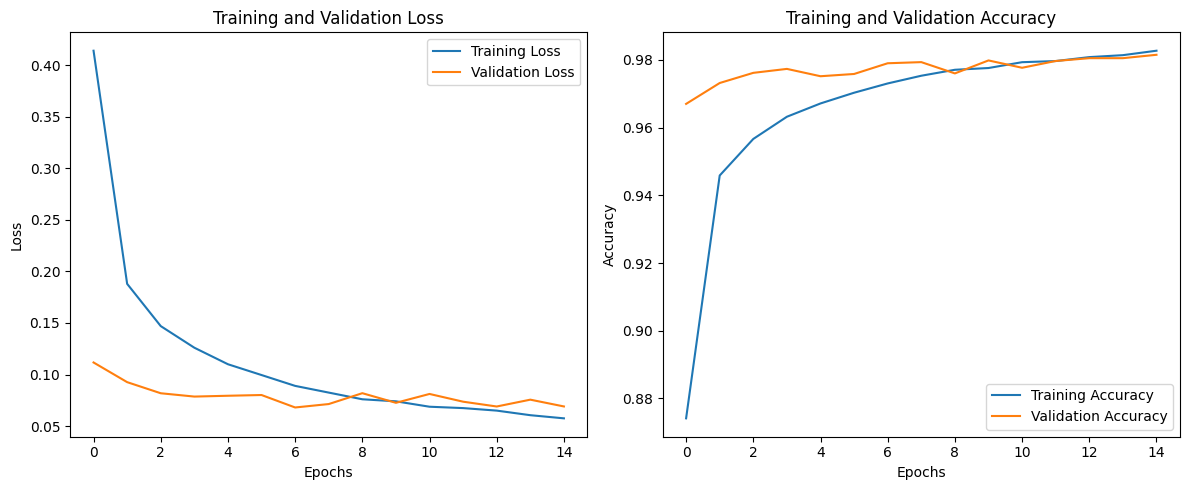

In [70]:
# Plotting training curves for loss and accuracy
# Plot loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [71]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0874
Test Accuracy: 97.96%


In [72]:
# create function to visualise our predictions
def plot_prediction(model, image, label):
    # Predict
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)

    # Plot the image
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_label}, Actual: {np.argmax(label)}")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


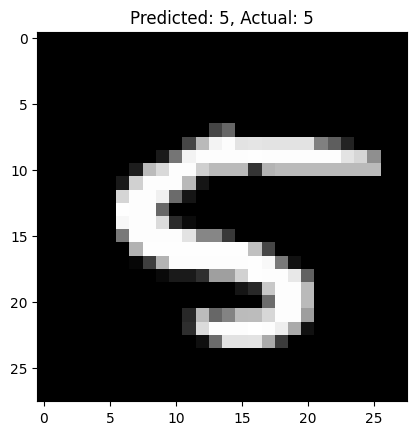

In [73]:
rand_ind = np.random.randint(0, len(x_test))
plot_prediction(model, x_test[rand_ind].reshape(1, 28, 28), y_test[rand_ind])

Let's play with our MLP:
1. Uncomment dropout layers and observe how the performance changed
2. Play with the number of layers/neurons
3. Play with the number of epochs and batch size. Comment on the performance and training curves
4. After steps 1-3, figure out the optimal set of hyperparameters and the corresponding performance
5. How does your performance change if you don't normalise pixel values?

### CNN

In [74]:
# load and process the data

num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [75]:
# Build the CNN model

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary() # print the summary

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
batch_size = 32
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8541 - loss: 0.4646 - val_accuracy: 0.9862 - val_loss: 0.0533
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9725 - loss: 0.0902 - val_accuracy: 0.9883 - val_loss: 0.0431
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9791 - loss: 0.0682 - val_accuracy: 0.9915 - val_loss: 0.0342
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9815 - loss: 0.0562 - val_accuracy: 0.9915 - val_loss: 0.0309
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9829 - loss: 0.0530 - val_accuracy: 0.9900 - val_loss: 0.0334
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9862 - loss: 0.0446 - val_accuracy: 0.9913 - val_loss: 0.0298
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9879 - loss: 0.0380 - val_accuracy: 0.9907 - val_loss: 0.0289
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9881 - loss: 0.038

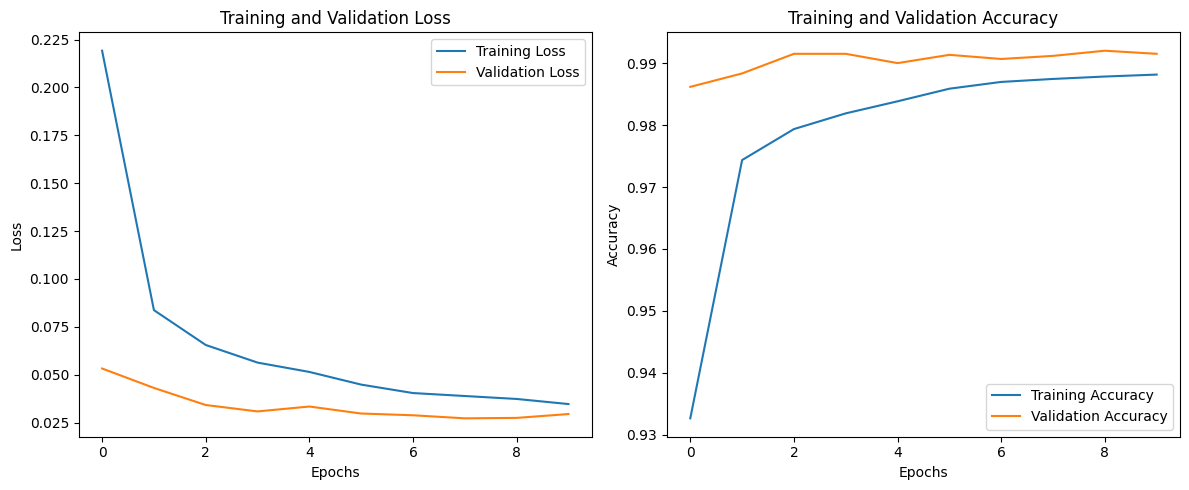

In [77]:
# Plotting training curves for loss and accuracy
# Plot loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [78]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025286564603447914
Test accuracy: 0.9914000034332275


In [79]:
# create function to visualise our predictions
def plot_prediction(model, image, label):
    # Predict
    prediction = model.predict(image.reshape(1, 28, 28, 1))
    predicted_label = np.argmax(prediction)

    # Plot the image
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_label}, Actual: {np.argmax(label)}")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


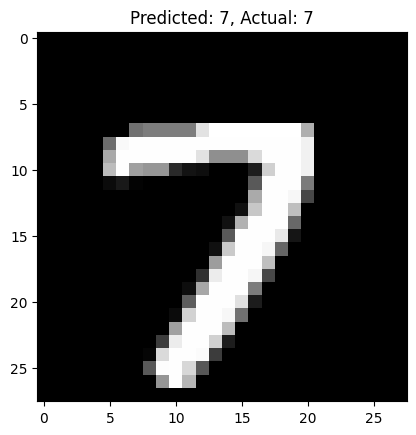

In [80]:
rand_ind = np.random.randint(0, len(x_test))
plot_prediction(model, x_test[rand_ind], y_test[rand_ind])

Play with the model hyperparameters
1. Number of filters in the convolutional layers
2. Sizes of the filters
3. Size of MaxPooling window (what would be if you used AveragePooling?)
4. Additional convolutions
5. Additional Densy layers
6. Dropout layer and its value